# Pythonで学ぶ 基礎からの機械学習入門
## 第4回 教師あり学習・回帰に挑戦してみよう

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [40]:
all_data = pd.read_csv("monthlyRent.csv")
all_data.head()

,都道府県,人口密度,県内総生産額,事業所数,コンビニ数,飲食店数,病院数,家賃
0,北 海 道,240.5,182688,233037,2194,28225,499,3723
1,青 森 県,405.1,44115,59958,404,7022,81,3671
2,岩 手 県,344.5,45162,59500,398,5838,76,4182
3,宮 城 県,739.8,88166,99539,777,9691,115,4582
4,秋 田 県,319.3,34773,50457,309,4983,56,3936


In [21]:
all_data.sort_values(by=['家賃'], ascending=False).head()

,都道府県,人口密度,県内総生産額,事業所数,コンビニ数,飲食店数,病院数,家賃
12,東 京 都,9528.5,931283,653819,4319,83397,592,8631
13,神奈川県,6205.8,302185,299573,2373,34503,294,7092
10,埼 玉 県,2811.4,206782,249078,1670,25409,292,6332
26,大 阪 府,6643.3,373150,413110,1877,50699,491,5847
27,兵 庫 県,1988.8,192325,224343,1189,28991,321,5693


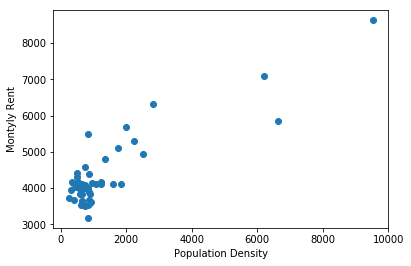

In [20]:
plt.scatter(all_data['人口密度'], all_data['家賃'])
plt.xlabel("Population Density")
plt.ylabel("Montyly Rent")
plt.show()

In [23]:
x1 = all_data[['人口密度']]
y1 = all_data['家賃']
model_1 = LinearRegression()
model_1.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

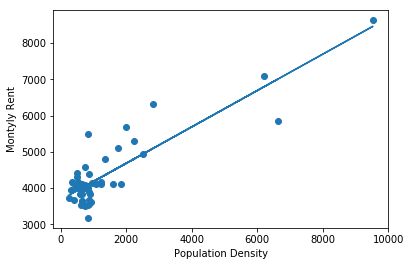

In [26]:
plt.scatter(all_data['人口密度'], all_data['家賃'])
plt.xlabel("Population Density")
plt.ylabel("Montyly Rent")
plt.plot(x1, model_1.predict(x1))
plt.show()


In [38]:
# y = a * x + b
print("a : ", model_1.coef_[0])
print("b : ", model_1.intercept_)
print("決定係数 : ", model_1.score(x1, y1))

print("人口密度4000のときの家賃: ",model_1.predict(10000)[0])

a :  0.501853516528
b :  3681.19648223
決定係数 :  0.76091862005
人口密度4000のときの家賃:  8699.73164751


In [ ]:
変数を拡張して線形回帰

In [43]:
# 目的変数として、家賃を用いる
y2 = all_data['家賃']
# 都道府県、家賃を落としたデータを説明変数として用いる
x2 = all_data.drop(['都道府県', '家賃'], axis=1)
x2.head()

,人口密度,県内総生産額,事業所数,コンビニ数,飲食店数,病院数
0,240.5,182688,233037,2194,28225,499
1,405.1,44115,59958,404,7022,81
2,344.5,45162,59500,398,5838,76
3,739.8,88166,99539,777,9691,115
4,319.3,34773,50457,309,4983,56


In [46]:
model_2 = LinearRegression()
model_2.fit(x2, y2)
print(pd.DataFrame({'係数名':x2.columns, '係数値':model_2.coef_}))
print("切片 : ", model_2.intercept_)
print("決定係数 : ", model_2.score(x2, y2))

        係数値     係数名
0  0.432700    人口密度
1 -0.000443  県内総生産額
2  0.005487    事業所数
3  0.603837   コンビニ数
4 -0.051374    飲食店数
5 -1.184765     病院数
切片 :  3587.40016326
決定係数 :  0.792383206471


In [47]:
# 実際に予測してみる

x_prediction = pd.DataFrame([[4000, 50000, 100000, 1000, 14000, 140]])
model_2.predict(x_prediction)

array([ 5563.45160471])